Answer-5.


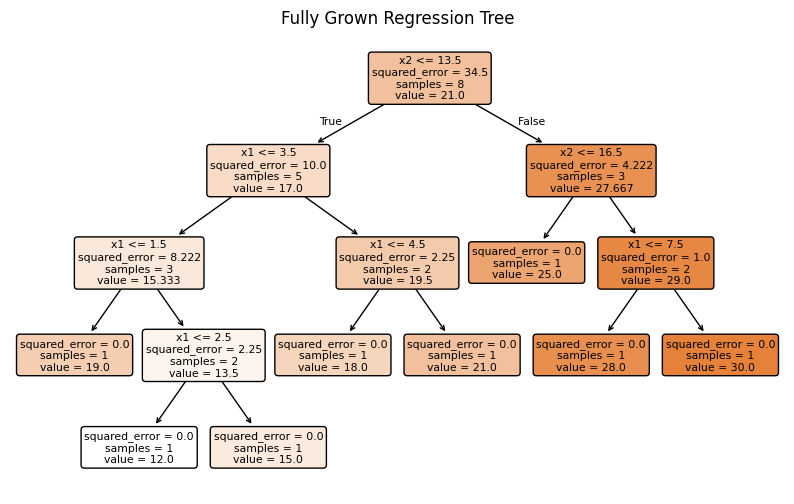

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data = {
    'x1': [1,2,3,4,5,6,7,8],
    'x2': [5,6,8,10,12,15,18,28],
    'y': [19,12,15,18,21,25,28,30]
}
df = pd.DataFrame(data)


X = df[['x1', 'x2']]
y = df['y']

# Fully grown tree with no depth hyperparameter
reg_tree = DecisionTreeRegressor(criterion='squared_error',random_state=0)
reg_tree.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(reg_tree, feature_names=['x1', 'x2'], filled=True, rounded=True)
plt.title("Fully Grown Regression Tree")
plt.show()


Answer-6.


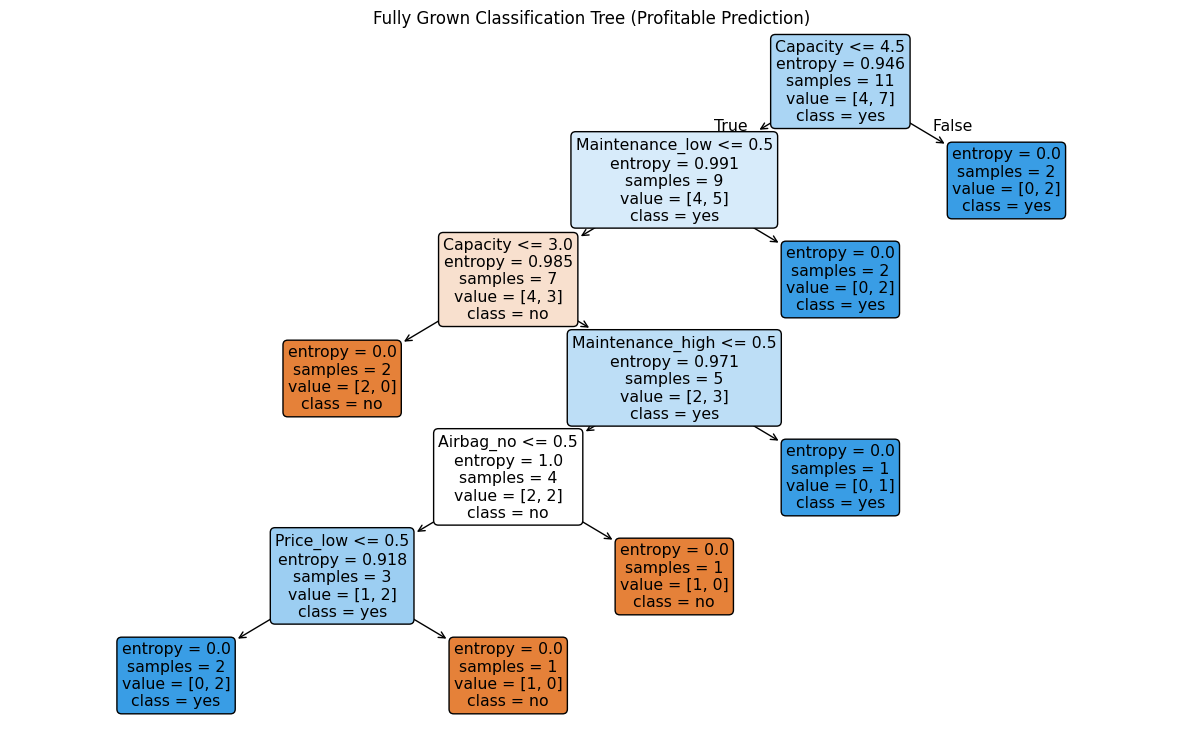

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data1 = {
    'Price': ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high'],
    'Maintenance': ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high'],
    'Capacity': [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 5],
    'Airbag': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'],
    'Profitable': ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']
}

df1 = pd.DataFrame(data1)

X = pd.get_dummies(df1.drop('Profitable', axis=1))
y = df1['Profitable'].map({'yes': 1, 'no': 0})

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

plt.figure(figsize=(15, 9))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.title("Fully Grown Classification Tree (Profitable Prediction)")
plt.show()


Answer-7.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ans-7a.
Training the model.

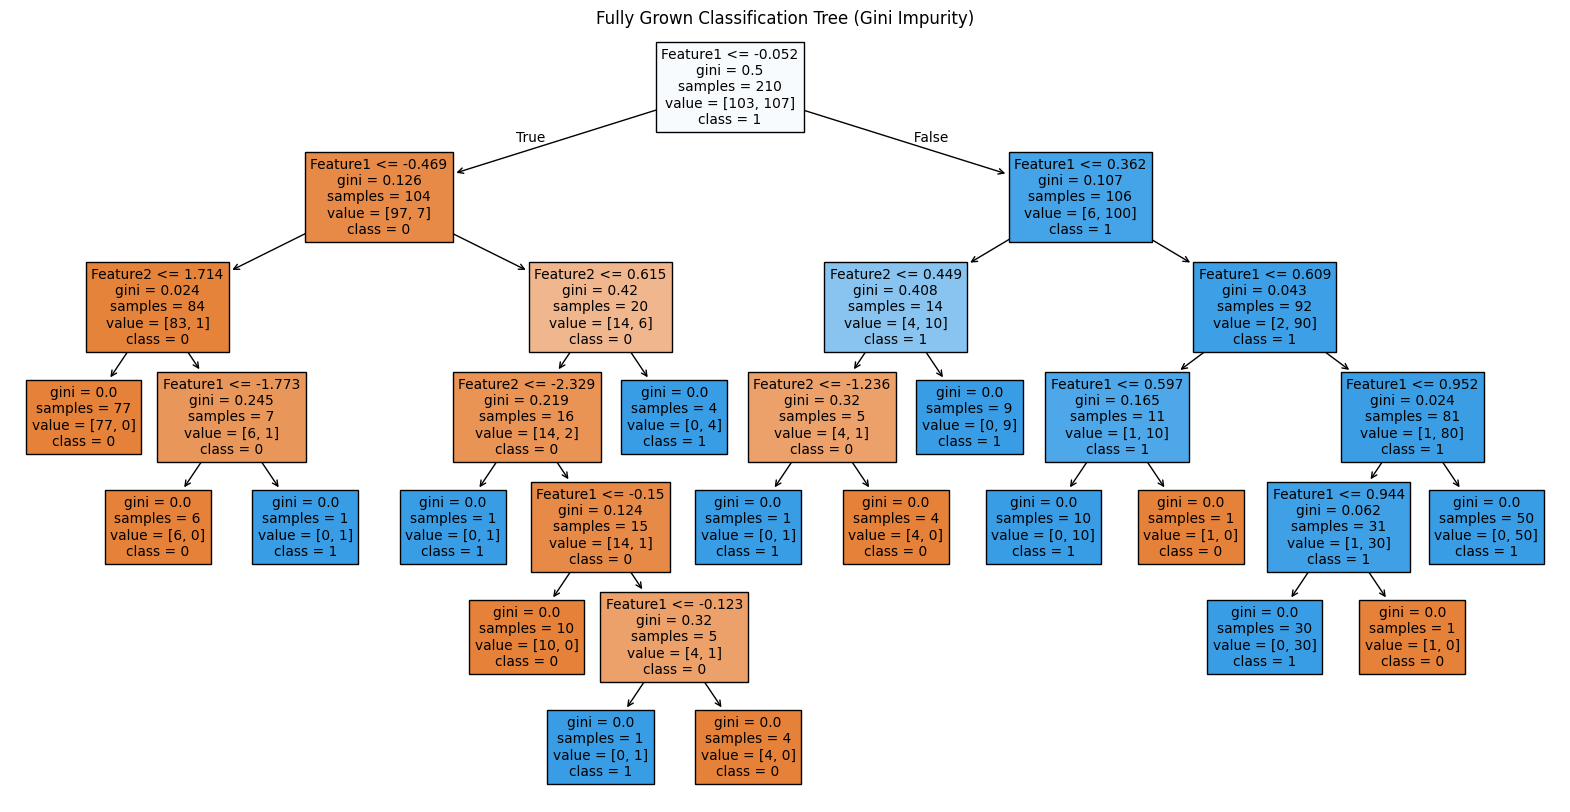

In [11]:
# LIbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error

# Fully grown tree with Gini

train_df = pd.read_csv("/content/drive/MyDrive/EE708/ReadingAssignment_train.csv")

X_train = pd.get_dummies(train_df.iloc[:,:2])
y_train = train_df.iloc[:, 2]

# Train fully grown tree using Gini impurity
clf_full = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_full.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf_full, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.title("Fully Grown Classification Tree (Gini Impurity)")
plt.show()


Ans-7b.
Testing the model.

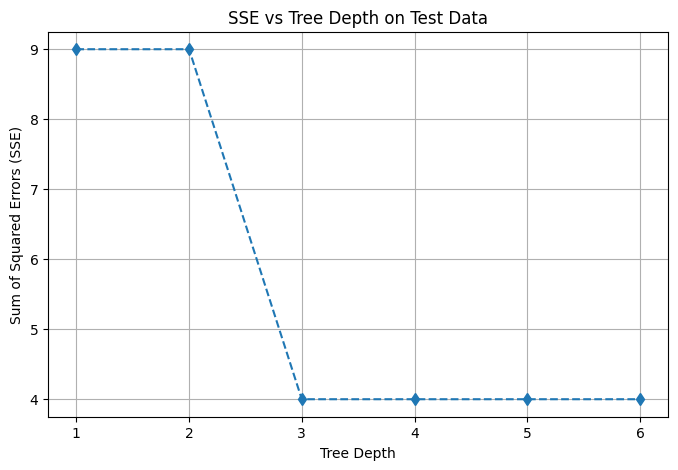

In [13]:
# Testing

test_df = pd.read_csv("/content/drive/MyDrive/EE708/ReadingAssignment_test.csv")
X_test = pd.get_dummies(test_df.iloc[:, :2])
y_test = test_df.iloc[:, 2]

# Store SSE and depth
sse_list = []
depth_range = range(1, clf_full.get_depth() + 1)

for d in depth_range:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=0)
    clf.fit(X_train, y_train)

    preds = clf.predict(X_test)
    sse = np.sum((preds - y_test) ** 2)
    sse_list.append(sse)

# Plot SSE vs depth
plt.figure(figsize=(8, 5))
plt.plot(depth_range, sse_list, marker='d', linestyle='--')
plt.xlabel("Tree Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("SSE vs Tree Depth on Test Data")
plt.grid()
plt.show()


Ans-7c
Pruning depth.

In [20]:
# Find depth where change in SSE is minimal
sse_diff = np.diff(sse_list)
threshold = 1
for i, diff in enumerate(sse_diff):
    if abs(diff) < threshold:
        optimal_depth = depth_range[i + 1]
        break
else:
    optimal_depth = depth_range[np.argmin(sse_list)]

print(f"Optimal Pruning Depth: {optimal_depth}")


Optimal Pruning Depth: 2


Ans-7d.
Tree with optimum pruning depth

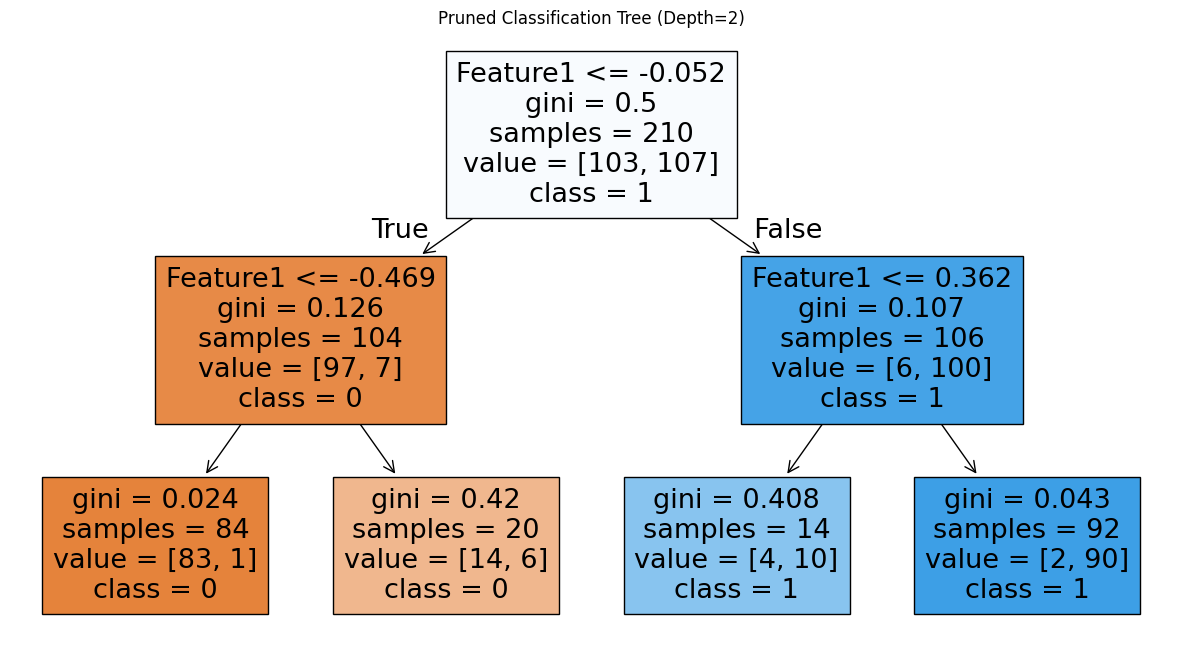

In [16]:

clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=0)
clf_pruned.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(clf_pruned, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.title(f"Pruned Classification Tree (Depth={optimal_depth})")
plt.show()
